In [3]:
from ultralytics import YOLO

# Load a model
# model = YOLO("yolov8n.yaml")  # build a new model from scratch
model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)

In [4]:
# Use the model
# model.train(data="/home/vorkov/Workspace/Python/CV-team/cv-team/CV-Project/dataset/road_signs/data.yaml", epochs=3)  # train the model
model.train(data="/home/vorkov/Workspace/Python/CV-team/cv-team/CV-Project/dataset/coco_dataset/coco.yaml", epochs=3)  # train the model

New https://pypi.org/project/ultralytics/8.0.199 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.198 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce RTX 4070 Laptop GPU, 7940MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/home/vorkov/Workspace/Python/CV-team/cv-team/CV-Project/dataset/coco_dataset/coco.yaml, epochs=3, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train25, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f641c7e1360>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

In [5]:
metrics = model.val()  # evaluate model performance on the validation set
metrics

Ultralytics YOLOv8.0.198 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce RTX 4070 Laptop GPU, 7940MiB)
Model summary (fused): 168 layers, 3006623 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /home/vorkov/Workspace/Python/CV-team/cv-team/CV-Project/dataset/coco_dataset/labels/val2017.cache... 372 images, 0 backgrounds, 0 corrupt: 100%|██████████| 372/372 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:02<00:00,  8.79it/s]
                   all        372        947      0.846      0.752      0.829      0.604
                 horse        372        251      0.783      0.721      0.753      0.516
              elephant        372        161      0.862      0.733      0.842      0.623
                  bear        372         64      0.888      0.741      0.826      0.636
                 zebra        372        263      0.796      0.787      0.858      0.615
               giraffe       

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f641bdc4820>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
        

In [9]:
results = model("/home/vorkov/Documents/download.jpeg")  # predict on an image
result = results[0]
box = result.boxes[0]


image 1/1 /home/vorkov/Documents/download.jpeg: 384x640 1 horse, 3.7ms
Speed: 0.7ms preprocess, 3.7ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


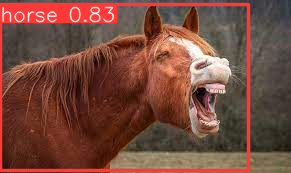

In [10]:
from PIL import Image
Image.fromarray(result.plot()[:,:,::-1])

In [11]:
path = model.export(format="onnx")  # export the model to ONNX format

Ultralytics YOLOv8.0.198 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (AMD Ryzen 9 7940HS w/ Radeon 780M Graphics)

PyTorch: starting from '/home/vorkov/Workspace/EDA/runs/detect/train25/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 9, 8400) (5.9 MB)

ONNX: starting export with onnx 1.14.1 opset 17...
ONNX: export success ✅ 0.5s, saved as '/home/vorkov/Workspace/EDA/runs/detect/train25/weights/best.onnx' (11.7 MB)

Export complete (2.0s)
Results saved to /home/vorkov/Workspace/EDA/runs/detect/train25/weights
Predict:         yolo predict task=detect model=/home/vorkov/Workspace/EDA/runs/detect/train25/weights/best.onnx imgsz=640  
Validate:        yolo val task=detect model=/home/vorkov/Workspace/EDA/runs/detect/train25/weights/best.onnx imgsz=640 data=/home/vorkov/Workspace/Python/CV-team/cv-team/CV-Project/dataset/coco_dataset/coco.yaml  
Visualize:       https://netron.app
